In [5]:
from src.generation import generate_k_parameters
from src.zsoc import OCV_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
# import the dataset
df = pd.read_csv('./res/K_para.csv')
df = df.drop(columns=['Sample No.', 'Battery Manufacturer', 'Serial Number', 'Cell Number'])
data = df.to_numpy()

# truncate off the last column (R0)
batteries = data[:, :-1]
print(batteries.shape)

(34, 8)


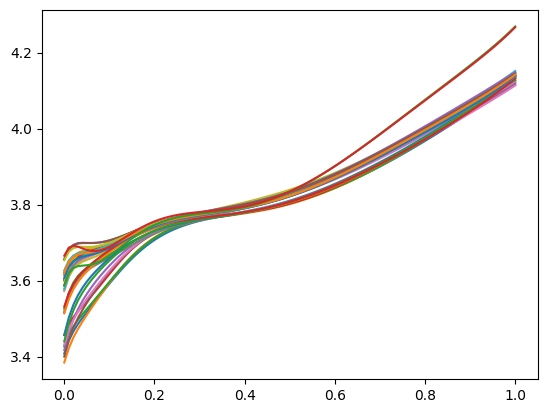

(34, 100)


In [11]:
# generate ocv curves for each battery
# for this stage, we will just use OCV curves as input
curves = []
for battery in batteries:
    b = OCV_curve(battery)
    plt.plot(b['zsoc'], b['Vo'])
    curves.append(b['Vo'])
plt.show()

curves = np.array(curves)
print(curves.shape)

In [8]:
# each curve is going to be used as the input
# the output will be the corresponding k parameters

# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='linear')
])

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

2022-11-01 11:21:13.717911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 11:21:13.780181: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 11:21:13.780518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 11:21:13.781709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [9]:
# train the model
model.fit(curves, batteries, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 753.7450
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 691.9509
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 654.8482
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 608.8273
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 548.9672
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 483.9473
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 414.3418
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 345.4900
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 277.3018
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 218.9615
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 178.5580
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 155.2440
Epoch 13/100
2/2 [===================